In [6]:
# MARKET BASKET ANALYSIS FOR LOOKING AT ASSOCIATION RULES IN PYTHON

## BASED ON CODE FROM MOFFITT (2017) - Practical Business Python


import pandas as pd
! pip install mlxtend
# FOLLOWING PACKAGE BEST IMPORTED AND INSTALLED VIA CONDA PROMPT
# conda install -c conda-forge mlxtend

from mlxtend.frequent_patterns import apriori            # EASY ASSOCIATION RULES PACKAGE FROM RABST
from mlxtend.frequent_patterns import association_rules

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
import matplotlib.pyplot as plt  # 2D plotting


In [7]:
# OBTAIN data from UCI machine learning archive

df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
# SCRUB data with some minor transformations

df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

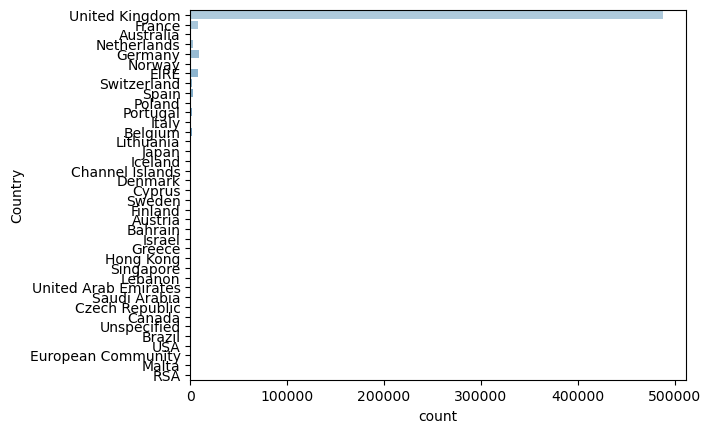

In [9]:
# EXPLORE data with some visuals

# BARPLOT SHOWING NUMBER ORDERS PER COUNTRY
sns.countplot(y="Country", data=df, palette="Blues_d")
plt.show()

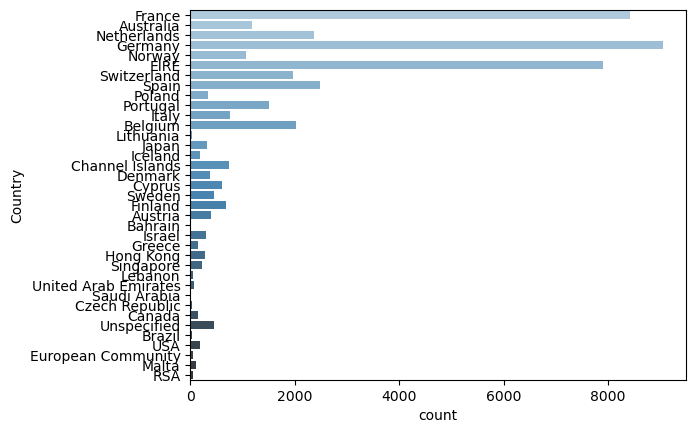

In [10]:
## BARPLOT MINUS UNITED KINGDOM
dfukless = df[df.Country != "United Kingdom"]
sns.countplot(y="Country", data=dfukless, palette="Blues_d")
plt.show()

In [11]:
## BREAKING OUT FOR JUST FRANCE

basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [12]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [13]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

C:\Users\Smith\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [14]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135


In [15]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
17,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735
18,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041
19,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122
20,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
21,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.102041,0.137755,0.099490,0.975000,7.077778,0.085433,34.489796
22,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.122449,0.132653,0.099490,0.812500,6.125000,0.083247,4.625850


In [16]:
## NOW LOOK AT GERMANY

basket2 = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_sets2 = basket2.applymap(encode_units)
basket_sets2.drop('POSTAGE', inplace=True, axis=1)
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)
rules4 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

rules4[ (rules4['lift'] >= 4) &
        (rules4['confidence'] >= 0.5)]

C:\Users\Smith\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN WOODLAND ANIMALS),0.115974,0.137856,0.067834,0.584906,4.242887,0.051846,2.076984
7,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.107221,0.137856,0.061269,0.571429,4.145125,0.046488,2.011670
11,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.843750,6.648168,0.050194,5.587746


In [17]:
## NOW LOOK AT Portugal

basket2 = (df[df['Country'] =="Portugal"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket_sets2 = basket2.applymap(encode_units)
basket_sets2.drop('POSTAGE', inplace=True, axis=1)
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05, use_colnames=True)
rules3 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

rules3[ (rules3['lift'] >= 8) &
        (rules3['confidence'] >= 0.8)]


C:\Users\Smith\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(50'S CHRISTMAS GIFT BAG LARGE),(WOODEN TREE CHRISTMAS SCANDINAVIAN),0.051724,0.068966,0.051724,1.0,14.500000,0.048157,inf
121,(STRAWBERRY FAIRY CAKE TEAPOT),(CERAMIC STRAWBERRY CAKE MONEY BANK),0.068966,0.086207,0.068966,1.0,11.600000,0.063020,inf
199,(JUMBO BAG ALPHABET),(CHARLOTTE BAG VINTAGE ALPHABET),0.051724,0.068966,0.051724,1.0,14.500000,0.048157,inf
200,(LUNCH BAG ALPHABET DESIGN),(CHARLOTTE BAG VINTAGE ALPHABET),0.068966,0.068966,0.068966,1.0,14.500000,0.064209,inf
201,(CHARLOTTE BAG VINTAGE ALPHABET),(LUNCH BAG ALPHABET DESIGN),0.068966,0.068966,0.068966,1.0,14.500000,0.064209,inf
...,...,...,...,...,...,...,...,...,...
334915,"(RED RETROSPOT CHARLOTTE BAG, JUMBO BAG VINTAG...","(JUMBO BAG PINK VINTAGE PAISLEY, JUMBO BAG SCA...",0.051724,0.051724,0.051724,1.0,19.333333,0.049049,inf
334916,"(RED RETROSPOT CHARLOTTE BAG, LUNCH BAG VINTAG...","(JUMBO BAG PINK VINTAGE PAISLEY, JUMBO BAG SCA...",0.051724,0.051724,0.051724,1.0,19.333333,0.049049,inf
334925,"(LUNCH BAG SPACEBOY DESIGN, JUMBO BAG RED RETR...","(RED RETROSPOT CHARLOTTE BAG, JUMBO BAG PINK V...",0.051724,0.051724,0.051724,1.0,19.333333,0.049049,inf
334933,"(JUMBO BAG VINTAGE LEAF, LUNCH BAG SPACEBOY DE...","(RED RETROSPOT CHARLOTTE BAG, JUMBO BAG PINK V...",0.051724,0.051724,0.051724,1.0,19.333333,0.049049,inf
